# Quiz Tasks

You are assigned to investigate through the MBA dataset, which is a synthetic data generated from the Wharton Class of 2025's statistics.

The dataset aims to predict the admission status based on other features.

The feature sets are as follows:

* application_id: Unique identifier for each application
* gender: Applicant's gender (Male, Female)
* gpa: Grade Point Average of the applicant (on 4.0 scale)
* major: Undergraduate major (Business, STEM, Humanities)
* race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)
* gmat: GMAT score of the applicant (800 points)
* work_exp: Number of years of work experience (Year)
* work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)
* admission: Admission status (Admit, Waitlist, Null: Deny)

The mapping of the categorical information on the dataset are as follows:

Here are the separate Python markdown tables:

### Gender

| Key   | Value |
|-------|-------|
| Male  | 0     |
| Female| 1     |

### Major Category

| Key        | Value |
|------------|-------|
| Business   | 1     |
| Humanities | 2     |
| STEM       | 3     |

### Race

| Key      | Value |
|----------|-------|
| Asian    | 1     |
| White    | 2     |
| Hispanic | 3     |
| Black    | 4     |
| Other    | 5     |

### Industry

| Key                  | Value |
|----------------------|-------|
| Technology           | 1     |
| PE/VC                | 2     |
| Consulting           | 3     |
| Investment Management| 4     |
| Other                | 5     |
| Investment Banking   | 5     |
| Financial Services   | 6     |
| Nonprofit/Gov        | 7     |
| Real Estate          | 8     |
| Health Care          | 9     |
| CPG                 | 10     |
| Media/Entertainment  | 11    |
| Retail               | 12    |
| Energy               | 13    |

### Decision

| Key      | Value |
|----------|-------|
| Admit    | 1     |
| Waitlist | 2     |
| Deny     | 3     |

### Tasks:

**1. Data Acquisition and Preprocessing (10 points)**

* Import necessary libraries like pandas, scikit-learn (sklearn).
* Explore the data: identify missing values, data types, and potential outliers. Preprocess the data by handling missing values (e.g., imputation or removal), encoding categorical features (e.g., one-hot encoding), and feature scaling/normalization (using techniques covered in previous readings).
* Split the data into training and testing sets (80% training, 20% testing, random seed = 42) using `train_test_split` from sklearn.model_selection.

**2. Model Building and Evaluation (30 points)**

* **K-Nearest Neighbors (KNN):**
    * Implement a KNN model using `sklearn`.
    * Use an appropriate distance metric from `sklearn`'s distance metrics.
    * Train the KNN model on the training data.
    * Experiment with different values of `k` (number of neighbors) and evaluate the model performance using cross-validation (5-fold CV) with cross validation function from `sklearn`. Choose the `k` that yields the best average accuracy.
* **Support Vector Machine (SVM):**
    * Implement an SVM model using `SVC` from `sklearn`.
    * Experiment with different kernel functions (e.g., linear, rbf) and regularization parameters (C) using a grid search approach with `GridSearchCV` from `sklearn`. Evaluate the model performance using cross-validation. Choose the combination of parameters that yields the best average accuracy.
* **Logistic Regression:**
    * Implement a Logistic Regression model using `LogisticRegression` from `sklearn`.
    * Train the model on the training data.
    * Consider using L1 or L2 regularization with `penalty` parameter to prevent overfitting. Evaluate the model performance using cross-validation.

**3. Model Comparison and Hyperparameter Tuning (20 points)**

* Compare the performance of KNN, SVM, and Logistic Regression models using metrics like accuracy, precision, recall, and F1-score (obtained using `classification_report` from `sklearn`).
* Discuss the strengths and weaknesses of each model in the context of this specific problem.
* Explain the purpose of hyperparameter tuning and its impact on model performance. Briefly discuss the difference between Grid Search and Random Search for hyperparameter optimization.

**4. Model Interpretation (20 points)**

* Evaluate the final, best-performing model on the testing set.
* Analyze the model's predictions and discuss potential limitations.
* For the chosen model (e.g., SVM with best hyperparameters), interpret the coefficients (if applicable) to understand the features that have the most significant impact on predicting age groups.

**5. Report and Conclusion (20 points)**

* Create a comprehensive summary of your work.
* Include sections for data exploration, model building (with code snippets), hyperparameter tuning, model evaluation, and interpretation.
* Discuss the overall findings, including the best performing model and insights gained from the project.

**Connecting Statistical Concepts:**

* Briefly explain how distance metrics relate to the concept of similarity between data points.
* Discuss the role of regularization (L1/L2 penalty) in Logistic Regression from a statistical perspective (e.g., reducing variance, model complexity).

**Deliverables:**

* Jupyter Notebook with well-documented code for all steps mentioned above.

**NOTE:** Take this as a classification problem and use the `age_group` as your target column. Hence, one of the steps would be to drop the `RIDAGEYR` column since this is just the numerical equivalent of our target column. Do this after exploring the dataset.

In [ ]:
import pandas as pd

In [ ]:
#read the file
df = pd.read_csv('MBA_final.csv')
df.head()

,gender,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,3.34,3,1,710.0,4.0,1,1
1,1,3.41,3,2,670.0,4.0,2,2
2,1,3.10,2,2,580.0,6.0,3,3
3,0,3.50,1,1,740.0,4.0,4,1
4,1,3.33,1,2,630.0,5.0,3,2


PART 1: DATA ACQUISITION AND PRE PROCESSING


In [ ]:
#import ness libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from numpy.testing import assert_almost_equal
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         1350 non-null   int64  
 1   gpa            1350 non-null   float64
 2   major          1350 non-null   int64  
 3   race           1350 non-null   int64  
 4   gmat           1350 non-null   float64
 5   work_exp       1350 non-null   float64
 6   work_industry  1350 non-null   int64  
 7   admission      1350 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 84.5 KB


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

gender           0
gpa              0
major            0
race             0
gmat             0
work_exp         0
work_industry    0
admission        0
dtype: int64


Text(0, 0.5, 'Count')

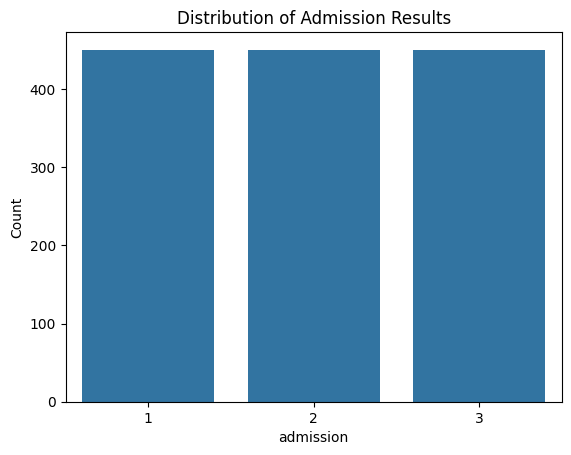

In [ ]:
adm_students = sns.countplot(data = df, x ='admission')
adm_students.set_title("Distribution of Admission Results")
adm_students.set_ylabel('Count')

In [ ]:
df.admission.value_counts()

,count
admission,
1,450
2,450
3,450


There is an equal/ balance distribution of admission results in the dataset

Text(0.5, 1.0, 'Correlation Heatmap of Student Features')

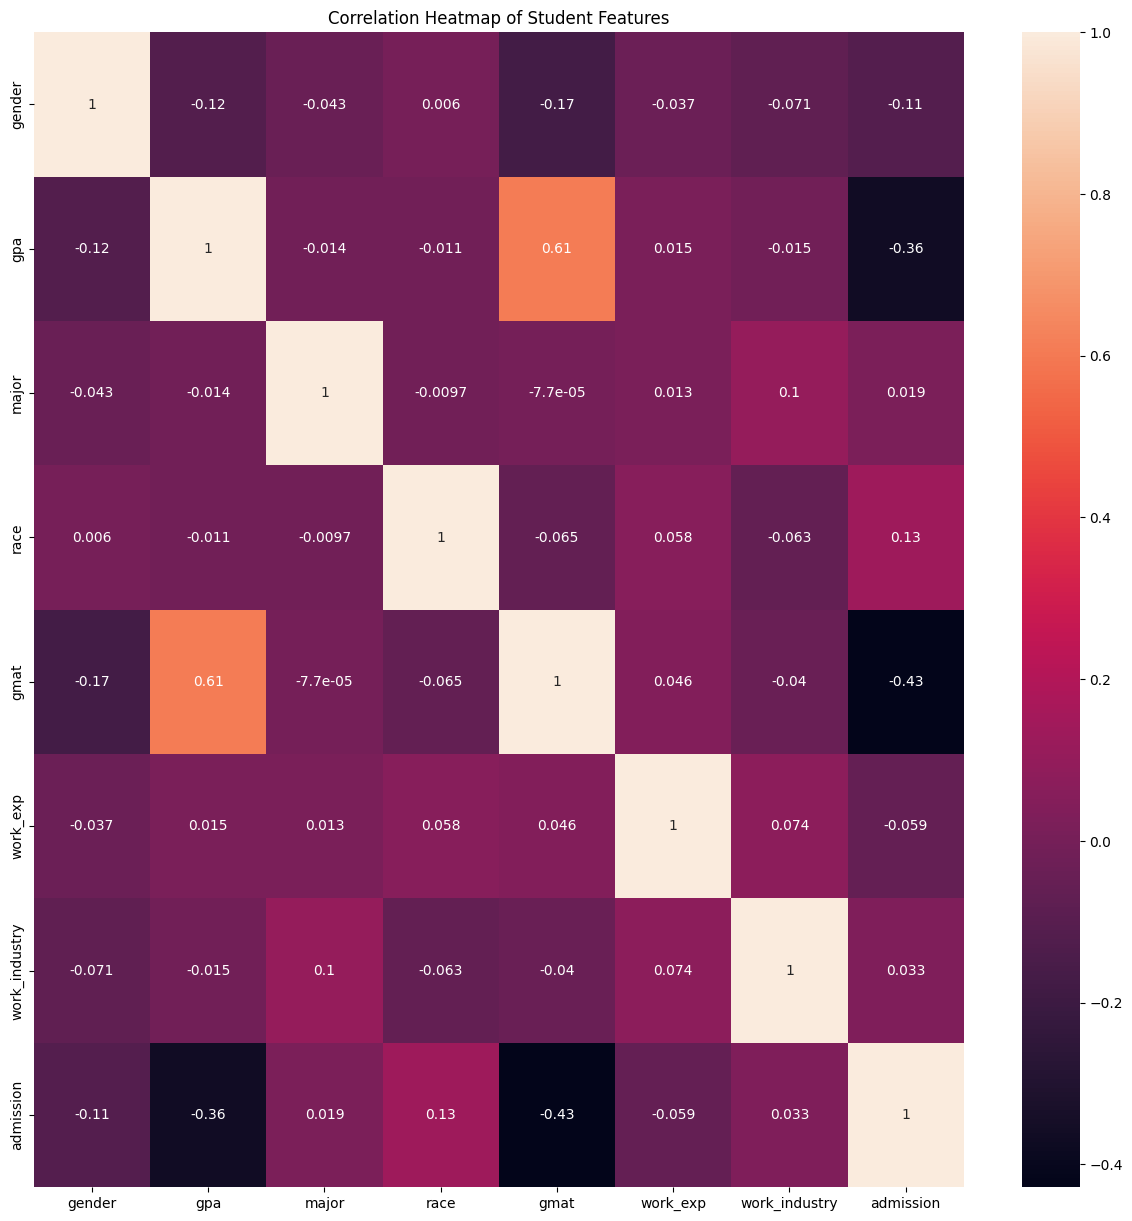

In [ ]:
#scaling of features

corr = df.corr()
fig, adm_students = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot = True)
adm_students.set_title("Correlation Heatmap of Student Features")

In [ ]:
df['admitIF'] = df.admission.apply(lambda x : 1 if x == 1 else 0)
df['admitIF'].value_counts()

,count
admitIF,
0,900
1,450


1 = admit
0 = Waitlist and Delay

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         1350 non-null   int64  
 1   gpa            1350 non-null   float64
 2   major          1350 non-null   int64  
 3   race           1350 non-null   int64  
 4   gmat           1350 non-null   float64
 5   work_exp       1350 non-null   float64
 6   work_industry  1350 non-null   int64  
 7   admission      1350 non-null   int64  
 8   admitIF        1350 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 95.0 KB


In [ ]:
#split

X = df.drop(columns=['admitIF', 'admission'])
y = df['admitIF']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1350, 7)
(1350,)
(1080, 7)
(270, 7)
(1080,)
(270,)


PART 2: MODEL BUILDING

KNN

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_res = []
for k in range(1,12):
  k_clf = KNeighborsClassifier(n_neighbors=k, p = 2)

  cv = KFold(n_splits=5)

  acc_k_score = cross_val_score(k_clf, X_train, y_train, scoring='accuracy', cv=cv).mean()
  pre_k_score = cross_val_score(k_clf, X_train, y_train, scoring='precision', cv=cv).mean()
  rec_k_score = cross_val_score(k_clf, X_train, y_train, scoring='recall', cv=cv).mean()
  f1_k_score = cross_val_score(k_clf, X_train, y_train, scoring='f1', cv=cv).mean()
  knn_res.append([k, acc_k_score, pre_k_score, rec_k_score, f1_k_score])

knn_res = pd.DataFrame(knn_res, columns=["k","accuracy", "precision", "recall", "f1"])
knn_res

,k,accuracy,precision,recall,f1
0,1,0.768519,0.660248,0.610331,0.632682
1,2,0.741667,0.691646,0.388834,0.494701
2,3,0.766667,0.661405,0.591464,0.621795
3,4,0.748148,0.688925,0.431876,0.525187
4,5,0.739815,0.623399,0.518061,0.562621
5,6,0.740741,0.660407,0.432711,0.516304
6,7,0.728704,0.606180,0.483256,0.534361
7,8,0.736111,0.656688,0.416203,0.505158
8,9,0.732407,0.622999,0.470991,0.533455
9,10,0.729630,0.659249,0.367796,0.469102


In [ ]:
knn_res[knn_res['accuracy'] == knn_res['accuracy'].max()]

,k,accuracy,precision,recall,f1
0,1,0.768519,0.660248,0.610331,0.632682


Based on the table, k=1 garnered the highest average frequency

In [ ]:
k_clf = KNeighborsClassifier(n_neighbors=1)
k_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [ ]:
param_grid = {
    'C' : [0.1, 0.001, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001, 10, 100],
    'kernel' : ['rbf']
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score' : make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),

}

clf_grid = GridSearchCV(SVC(), param_grid, scoring=scorers, refit="accuracy_score")
clf_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100],
                         'kernel': ['rbf']},
             refit='accuracy_score',
             scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                      'precision_score': make_scorer(precision_score, response_method='predict'),
                      'recall_score': make_scorer(recall_score, response_method='predict')})

In [ ]:
clf_grid.cv_results_

{'mean_fit_time': array([0.07016864, 0.04830308, 0.04111762, 0.04370704, 0.04220309,
        0.06324878, 0.0337275 , 0.02760057, 0.02573032, 0.0215816 ,
        0.02233348, 0.02069683, 0.02402821, 0.02562013, 0.03557086,
        0.03545446, 0.02537146, 0.02968893, 0.02550135, 0.03838725,
        0.0345634 , 0.0344584 , 0.05482244, 0.04078732, 0.04414759,
        0.04086876, 0.03401842, 0.03742161, 0.03501601, 0.04917765,
        0.11864662, 0.16217413, 0.08291502, 0.03438177, 0.03394055]),
 'std_fit_time': array([0.02691626, 0.00218915, 0.00326414, 0.0011257 , 0.00076196,
        0.0045585 , 0.01098122, 0.00167521, 0.00124436, 0.00314252,
        0.00233179, 0.00078746, 0.00096159, 0.00065314, 0.00088166,
        0.00562298, 0.00105851, 0.00197096, 0.00144004, 0.00518477,
        0.00207659, 0.00026001, 0.00811243, 0.00670382, 0.00585968,
        0.00744331, 0.00095038, 0.00686708, 0.00050685, 0.00492569,
        0.01056665, 0.01965273, 0.01945195, 0.00057548, 0.00086462]),
 'mean_scor

In [ ]:
print("Best parameters:", clf_grid.best_params_)
print("Best average accuracy:", clf_grid.best_score_)

Best parameters: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best average accuracy: 0.7768518518518519


The combination of parameters that yields the best average accuracy is C = 1000, gamma = 0.01, and kernel = rbf

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [ ]:
log_res = []
C_res = []
p_res = []


C = [0.01, 0.0001, 0.1, 1]
penalty = ['l1', 'l2']

for c in C:
  for p in penalty:
    if p == 'l2':
      logreg_clf = LogisticRegression(penalty=p, C=c, max_iter=500)

    elif p == 'l1':
      logreg_clf = LogisticRegression(penalty=p, C=c, max_iter=500, solver = 'liblinear')

    cv = KFold(n_splits=5)
    acc_log_score = cross_val_score(logreg_clf, X_train, y_train, scoring='accuracy', cv=cv).mean()
    pre_log_score = cross_val_score(logreg_clf, X_train, y_train, scoring='precision', cv=cv).mean()
    rec_log_score = cross_val_score(logreg_clf, X_train, y_train, scoring='recall', cv=cv).mean()
    f1_log_score = cross_val_score(logreg_clf, X_train, y_train, scoring='f1', cv=cv).mean()

    C_res.append(c)
    p_res.append(p)
    log_res.append([acc_log_score, pre_log_score, rec_log_score, f1_log_score])

log_res = pd.DataFrame(knn_res, columns=['accuracy', 'precision', 'recall', 'f1'])
log_res['penalty'] = pd.Series(p_res)
log_res['c'] = pd.Series(C_res)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

In [ ]:
log_res

,accuracy,precision,recall,f1,penalty,c
0,0.768519,0.660248,0.610331,0.632682,l1,0.0100
1,0.741667,0.691646,0.388834,0.494701,l2,0.0100
2,0.766667,0.661405,0.591464,0.621795,l1,0.0001
3,0.748148,0.688925,0.431876,0.525187,l2,0.0001
4,0.739815,0.623399,0.518061,0.562621,l1,0.1000
5,0.740741,0.660407,0.432711,0.516304,l2,0.1000
6,0.728704,0.606180,0.483256,0.534361,l1,1.0000
7,0.736111,0.656688,0.416203,0.505158,l2,1.0000
8,0.732407,0.622999,0.470991,0.533455,NaN,NaN
9,0.729630,0.659249,0.367796,0.469102,NaN,NaN


In [ ]:
logreg_clf.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=500)

PART 3: COMPARE

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred_knn = k_clf.predict(X_test)
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       175
           1       0.71      0.62      0.66        95

    accuracy                           0.78       270
   macro avg       0.76      0.74      0.75       270
weighted avg       0.77      0.78      0.77       270



In [ ]:
pred_svm = clf_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       175
           1       0.74      0.59      0.65        95

    accuracy                           0.78       270
   macro avg       0.77      0.74      0.75       270
weighted avg       0.78      0.78      0.77       270



In [ ]:
pred_logreg = logreg_clf.predict(X_test)
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       175
           1       0.50      0.24      0.33        95

    accuracy                           0.65       270
   macro avg       0.59      0.56      0.54       270
weighted avg       0.62      0.65      0.61       270



**KNN**

The KNN model performs well in predicting the decision results students as it totaled an accuracy value of 78%. Moreover, in terms of predicting Admitted students, it has a precision of 71% with a recall of 62%. As for the status of those who got rejected or waitlisted (0) it has a precision score of 81% and a recall value of 86%. The results showed that the KNN model was effective to predict the admission status of students

**SVM**

As for the SVM results, similar to the KNN it garnered an accuracy score of 78%. Its precision score to predict accepted students is 74% while it got a precision score of 80% for rejected/ waitlisted students.


**LOGREG**

As for the LOG REG results, the model garnered an accuracy score of 65%, the lowest accuracy score among the 3 models. It scored a 68% precision score in predicting rejected/ waitlisted students and 50% score for those accepted. Just by the precision socre we could already tell that it permormed poorly compared to the other models.  


PART 4: MODEL INTERPRETATION

**BEST MODEL:**

Based on the performance of all models, the KNN model is the best-performing model.

PART 5: REPORT AND CONCLUSION



For this Exam, I was tasked to investigate the MBA dataset. The process began with data exploration/ EDA, where I examined the structure and characteristics of the data. Moreover, I explored if there are any null values in the dataset and checked the distribution of the admission results of the student. I then created a binary target variable "admitIF" to distinguish the admission results of applicants. I assigned 1 to admitted applicants and 0 for Denied/Waitlisted Applicants. Afterward the data was split into training and testing sets for further analysis.


After splitting the data, I created 3 model - KNN, SVM, and LOG REG. For KNN, I evaluated a range of k values to identify which k value would give the best ave accuracy of the model. As for SVM, I configured the model by utilizing grid search and the use of parameters such as C, gamma, and kernel rbf. Lastly for Logistic regression, the model was evaluated with both l2 and l2 regularization penalties. After creating the models, I evaluated the performance of each model by evaluating their accuracy, precision, recall, and f1 values. The KNN model emerging as the best-performing model, due to its well-balanced and high accuracy, precision, recall, and f1 scores in predicting the admission status of students of the university.

